In [1]:
import numpy as np
import pandas as pd
import anndata as ad 
from scipy.sparse import csr_matrix
# import plotly.express as px
# import matplotlib.pyplot as plt
import scanpy as sc
from IPython.display import display

# Full data exploration, no heavy processing

In [2]:
anndata = ad.io.read_h5ad('../data/GSE194122_openproblems_neurips2021_cite_BMMC_processed.h5ad')

/home/denis/miniconda3/envs/sem/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [3]:
anndata

AnnData object with n_obs × n_vars = 90261 × 14087
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id'
    uns: 'dataset_id', 'genome', 'organism'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

## X

In [4]:
anndata.X

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 141495252 stored elements and shape (90261, 14087)>

## Var

In [5]:
anndata.var

,feature_types,gene_id
AL627309.5,GEX,ENSG00000241860
LINC01409,GEX,ENSG00000237491
LINC01128,GEX,ENSG00000228794
LINC00115,GEX,ENSG00000225880
FAM41C,GEX,ENSG00000230368
...,...,...
HLA-E,ADT,ENSG00000204592
CD82,ADT,ENSG00000085117
CD101,ADT,ENSG00000134256
CD88,ADT,NaN


\#question why gene_id is sometimes Nan?  
\#question what do index names mean?

In [10]:
if not anndata.var.index.is_unique:
    display(anndata.var[anndata.var.index.duplicated(keep=False)].sort_index())

,feature_types,gene_id
CD101,ADT,ENSG00000134256
CD101,GEX,ENSG00000134256
CD14,ADT,ENSG00000170458
CD14,GEX,ENSG00000170458
CD163,GEX,ENSG00000177575
...,...,...
HLA-E,ADT,ENSG00000204592
KLRG1,ADT,ENSG00000139187
KLRG1,GEX,ENSG00000139187
TIGIT,ADT,ENSG00000181847


In [11]:
anndata.var['feature_types'].value_counts()

feature_types
GEX    13953
ADT      134
Name: count, dtype: int64

In [12]:
anndata.var['gene_id'].value_counts()

gene_id
ENSG00000168329    2
ENSG00000196776    2
ENSG00000085117    2
ENSG00000139193    2
ENSG00000125810    2
                  ..
ENSG00000132003    1
ENSG00000132004    1
ENSG00000132005    1
ENSG00000132010    1
ENSG00000131873    1
Name: count, Length: 13953, dtype: int64

In [14]:
anndata.var.query('gene_id.isna()')['feature_types'].unique()

['ADT']
Categories (2, object): ['ADT', 'GEX']

## obs

In [15]:
anndata.obs.head()

,GEX_n_genes_by_counts,GEX_pct_counts_mt,GEX_size_factors,GEX_phase,ADT_n_antibodies_by_counts,ADT_total_counts,ADT_iso_count,cell_type,batch,ADT_pseudotime_order,...,DonorID,DonorAge,DonorBMI,DonorBloodType,DonorRace,Ethnicity,DonorGender,QCMeds,DonorSmoker,is_train
GCATTAGCATAAGCGG-1-s1d1,893,6.723979,0.356535,G1,115,2828.0,5.0,Naive CD20+ B IGKC+,s1d1,NaN,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
TACAGGTGTTAGAGTA-1-s1d1,2606,8.008829,1.292643,S,137,8819.0,21.0,CD14+ Mono,s1d1,NaN,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
AGGATCTAGGTCTACT-1-s1d1,1867,6.959707,0.970558,G2M,116,4088.0,12.0,Naive CD20+ B IGKC+,s1d1,NaN,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
GTAGAAAGTGACACAG-1-s1d1,2360,6.109234,1.232604,G2M,124,4447.0,9.0,HSC,s1d1,NaN,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
TCCGAAAAGGATCATA-1-s1d1,455,0.294394,0.044585,S,132,12875.0,24.0,Reticulocyte,s1d1,0.735261,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train


In [16]:
anndata.obs.columns

Index(['GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors',
       'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts',
       'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order',
       'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality',
       'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType',
       'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker',
       'is_train'],
      dtype='object')

In [17]:
anndata.obs['cell_type'].value_counts()

cell_type
CD14+ Mono                          21693
CD4+ T activated                     6966
CD4+ T naive                         5897
NK                                   5434
Reticulocyte                         4272
Erythroblast                         4039
Naive CD20+ B IGKC+                  3990
CD8+ T naive                         3107
CD16+ Mono                           2635
NK CD158e1+                          2167
Naive CD20+ B IGKC-                  1979
G/M prog                             1881
pDC                                  1758
HSC                                  1703
cDC2                                 1702
Lymph prog                           1681
Transitional B                       1575
Proerythroblast                      1512
CD8+ T CD57+ CD45RO+                 1470
Normoblast                           1435
CD8+ T CD57+ CD45RA+                 1303
CD8+ T TIGIT+ CD45RO+                1160
CD4+ T activated integrinB7+         1056
CD8+ T TIGIT+ CD45RA+   

In [18]:
anndata.obs['cell_type'].nunique()

45

In [19]:
anndata.obs['batch'].value_counts()

batch
s3d7    11473
s3d6    11035
s2d1    10465
s3d1     9521
s2d5     9122
s4d9     7365
s1d3     6106
s2d4     5584
s4d1     5456
s1d1     5227
s1d2     4978
s4d8     3929
Name: count, dtype: int64

In [21]:
anndata.obs['Modality'].value_counts()

Modality
cite    90261
Name: count, dtype: int64

In [20]:
anndata.obs['Samplename'].value_counts()

Samplename
site3_donor7_cite    11473
site3_donor6_cite    11035
site2_donor1_cite    10465
site3_donor1_cite     9521
site2_donor5_cite     9122
site4_donor9_cite     7365
site1_donor3_cite     6106
site2_donor4_cite     5584
site4_donor1_cite     5456
site1_donor1_cite     5227
site1_donor2_cite     4978
site4_donor8_cite     3929
Name: count, dtype: int64

## uns

In [30]:
anndata.uns

{'dataset_id': 'openproblems_bmmc_cite',
 'genome': 'GRCh38',
 'organism': 'human'}

## obsm

In [26]:
anndata.obsm['ADT_X_pca'].shape

(90261, 50)

In [27]:
anndata.obsm['ADT_X_umap'].shape

(90261, 2)

In [29]:
anndata.obsm['ADT_isotype_controls']

,Mouse-IgG1,Mouse-IgG2a,Mouse-IgG2b,Rat-IgG2b,Rat-IgG1,Rat-IgG2a
GCATTAGCATAAGCGG-1-s1d1,0.154378,0.000000,0.000000,0.154378,0.405996,0.000000
TACAGGTGTTAGAGTA-1-s1d1,0.164562,0.272340,0.164562,0.085662,0.043748,0.125890
AGGATCTAGGTCTACT-1-s1d1,0.406494,0.406494,0.319296,0.000000,0.118126,0.000000
GTAGAAAGTGACACAG-1-s1d1,0.209837,0.209837,0.110412,0.110412,0.300264,0.000000
TCCGAAAAGGATCATA-1-s1d1,0.487043,0.918685,0.118227,0.223942,0.319543,0.118227
...,...,...,...,...,...,...
GAATCACCACGGAAGT-1-s4d9,0.340464,0.126809,0.340464,0.126809,0.126809,0.126809
GCTGGGTGTACGGATG-1-s4d9,0.565802,0.226035,0.410280,0.119390,0.119390,0.000000
TCGAAGTGTGACAGGT-1-s4d9,0.509506,0.321863,0.173826,0.000000,0.090685,0.000000
GCAGGCTGTTGCATAC-1-s4d9,0.197788,0.362841,0.197788,0.070366,0.070366,0.197788


In [32]:
anndata.obsm['GEX_X_pca'].shape

(90261, 50)

In [33]:
anndata.obsm['GEX_X_umap'].shape

(90261, 2)

## layers

In [35]:
anndata.layers['counts']

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 141495252 stored elements and shape (90261, 14087)>

\#question: what are layers?

# Select and visualize subset

In [36]:
np.random.seed(42)
batches = np.random.choice(anndata.obs['batch'].unique(), 3, replace=False)
genes = anndata.var['gene_id'].sample(1000)
anndata = anndata[anndata.obs['batch'].isin(batches), anndata.var['gene_id'].isin(genes)]

anndata.write_h5ad('../data/cite_filter.h5ad')

anndata = ad.io.read_h5ad('../data/cite_filter.h5ad')

/home/denis/miniconda3/envs/sem/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


![img](https://www.sc-best-practices.org/_images/anndata.jpg)

In [37]:
anndata.var_names_make_unique()

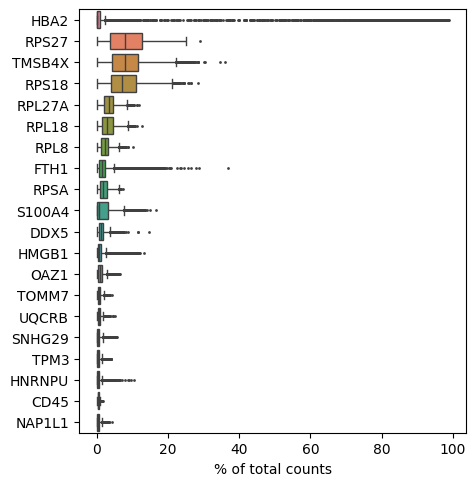

In [38]:
sc.pl.highest_expr_genes(anndata, n_top=20)

In [39]:
sc.pp.filter_cells(anndata, min_genes=200)
sc.pp.filter_genes(anndata, min_cells=3)

In [40]:
sc.tl.pca(anndata, svd_solver="arpack")

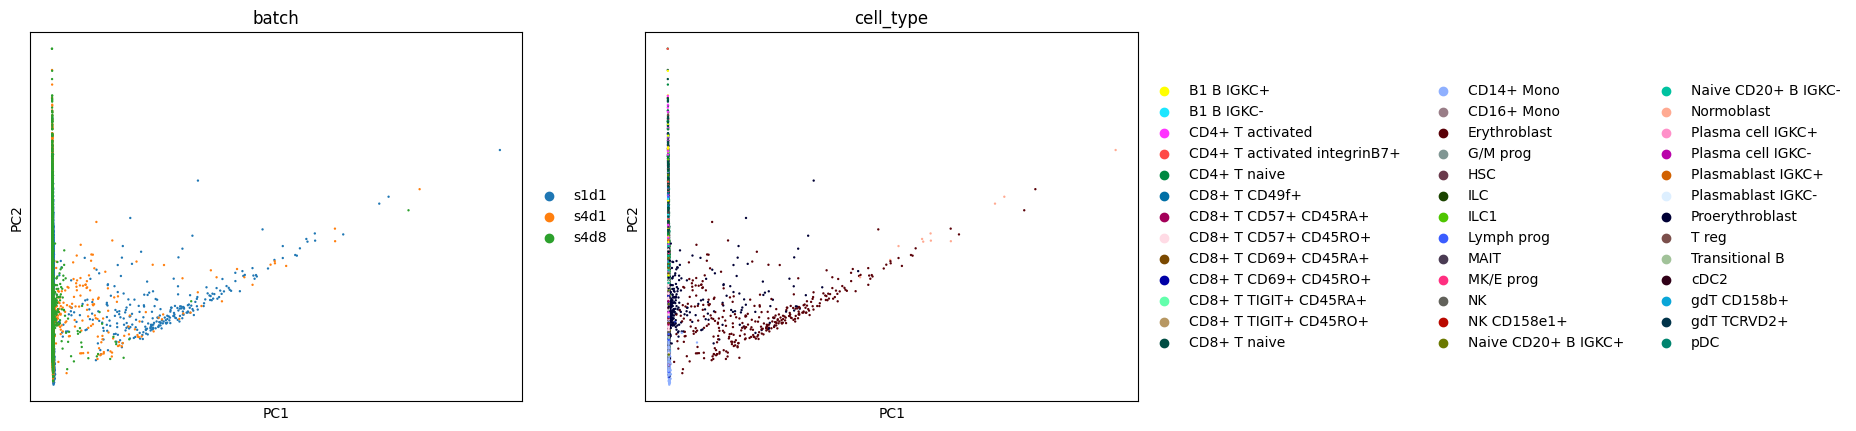

In [43]:
sc.pl.pca(anndata, color=['batch', 'cell_type'])

In [44]:
sc.pp.neighbors(anndata, n_neighbors=10, n_pcs=40)

/home/denis/miniconda3/envs/sem/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


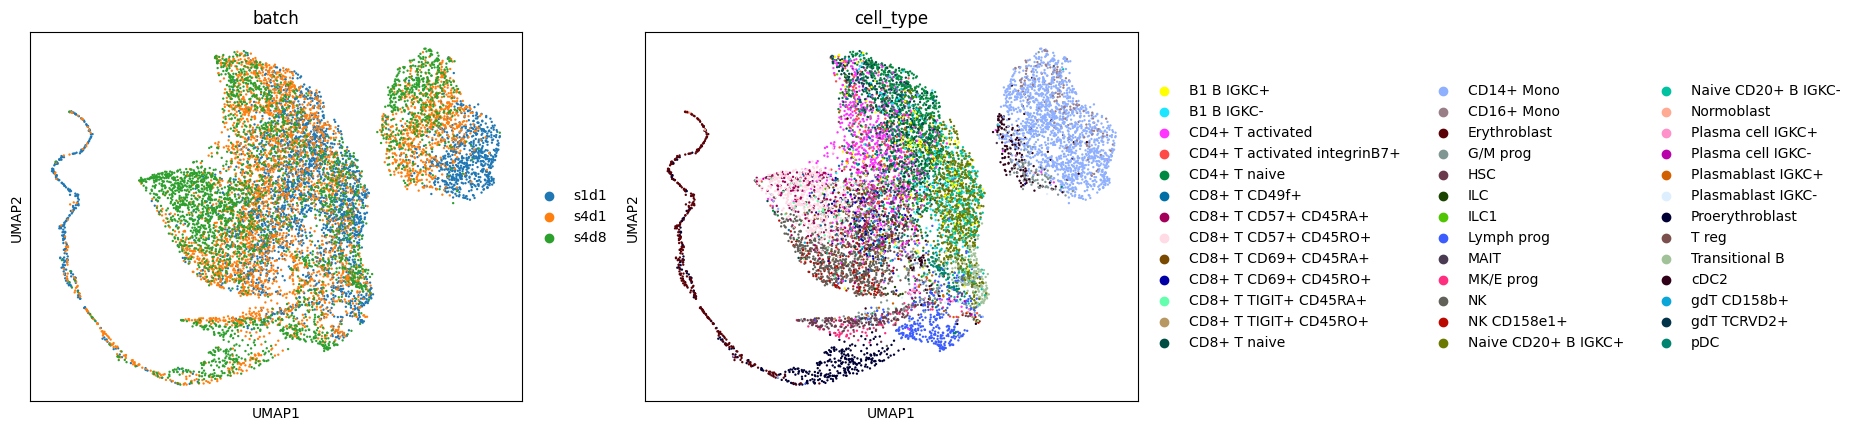

In [45]:
sc.tl.umap(anndata)
sc.pl.umap(anndata, color=['batch', 'cell_type'])